In [55]:
import pandas as pd

positive = pd.read_csv('data/processed_dataset/positive/sentiments_with_aspect.csv')
negative = pd.read_csv('data/processed_dataset/negative/sentiments_with_aspect.csv')
neutral = pd.read_csv('data/processed_dataset/neutral/sentiments_with_aspect.csv')
ambivalent = pd.read_csv('data/processed_dataset/ambivalent/sentiments_with_aspect.csv')
# concatenate all the dataframes
df = pd.concat([positive, negative, neutral, ambivalent], ignore_index=True)
# filter nan values
df = df.dropna()
df

,id,sentiment,actor,aspect
0,2a280170-465d-46dc-976a-6019350b9cc3,positive,DI Dr. Brigitte Bach,Qualifikationen
1,2a280170-465d-46dc-976a-6019350b9cc3,positive,DI Dr. Brigitte Bach,Allgemeine Managementfähigkeit
3,2a280170-465d-46dc-976a-6019350b9cc3,positive,Univ.-Prof. Dr. Andreas Kugi,Qualifikationen
4,2a280170-465d-46dc-976a-6019350b9cc3,positive,Univ.-Prof. Dr. Andreas Kugi,Allgemeine Managementfähigkeit
6,2a280170-465d-46dc-976a-6019350b9cc3,positive,Mag. Alexander Svejkovsky,Qualifikationen
...,...,...,...,...
34561,505d93b0-7143-41ed-a33a-18cdd237c5ca,neutral,Wirtschaftsagentur EcoPlus,Arbeitsmarkt/Arbeitsrecht
34562,505d93b0-7143-41ed-a33a-18cdd237c5ca,neutral,Wirtschaftsagentur EcoPlus,Wirtschaftsstandort NÖ
34564,8e6c9db9-8ca1-421d-9923-c3ff77243ce1,neutral,Wirtschaftsagentur EcoPlus,Aus- und Weiterbildung
34565,8e6c9db9-8ca1-421d-9923-c3ff77243ce1,neutral,Wirtschaftsagentur EcoPlus,Steuern & Förderungen (inkl. Pendler)


In [3]:
# how many different values for aspect lesser than 10
df['aspect'].value_counts()[df['aspect'].value_counts() < 10]

aspect
Graf Monika                                 9
Internationale Aufmerksamkeit               9
Banken & Finanzen                           9
100 Jahre ÖBB                               9
Unternehmensfremde Funktion                 9
                                           ..
Rechtswissenschaften - Forschungserfolge    1
Kultursponsoring                            1
luis                                        1
Ruckhofer Sarah                             1
Landsmann Nicole                            1
Name: count, Length: 256, dtype: int64

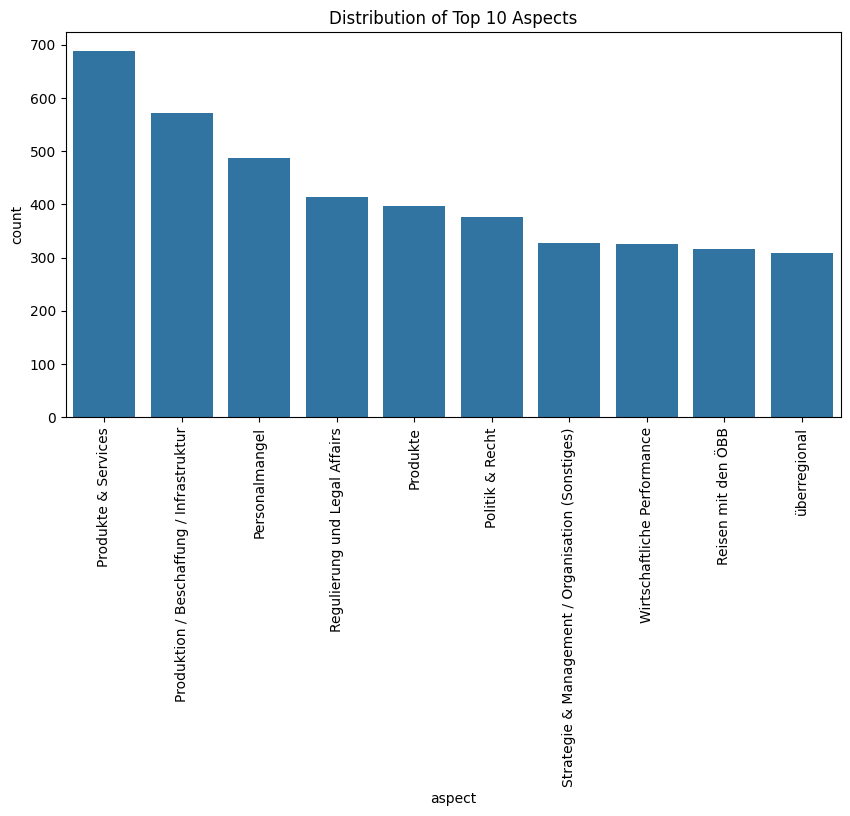

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate the counts of each aspect
aspect_counts = df['aspect'].value_counts()

# Select the top 10 aspects
top_10_aspects = aspect_counts.nlargest(10).index

# Filter the DataFrame to include only the top 10 aspects
filtered_df = df[df['aspect'].isin(top_10_aspects)]

# Plot the distribution of the top 10 aspects
plt.figure(figsize=(10, 5))
sns.countplot(data=filtered_df, x='aspect', order=top_10_aspects)
plt.title('Distribution of Top 10 Aspects')
plt.xticks(rotation=90)
plt.show()



In [9]:
filtered_df['aspect'].value_counts()

aspect
Produkte & Services                                  689
Produktion / Beschaffung / Infrastruktur             572
Personalmangel                                       488
Regulierung und Legal Affairs                        413
Produkte                                             397
Politik & Recht                                      377
Strategie & Management / Organisation (Sonstiges)    328
Wirtschaftliche Performance                          325
Reisen mit den ÖBB                                   316
überregional                                         308
Name: count, dtype: int64

/tmp/ipykernel_704812/1908933379.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df, x='aspect', y='count', palette='viridis')


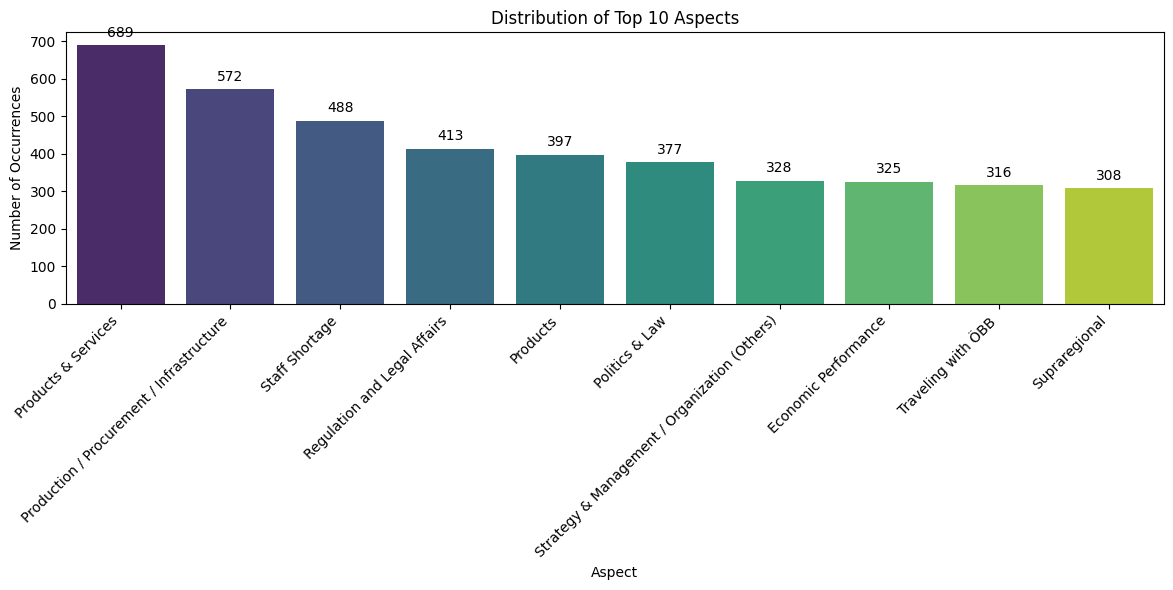

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a DataFrame with the translated aspect names and their counts
data = {
    'aspect': [
        'Products & Services', 'Production / Procurement / Infrastructure', 'Staff Shortage',
        'Regulation and Legal Affairs', 'Products', 'Politics & Law',
        'Strategy & Management / Organization (Others)', 'Economic Performance', 
        'Traveling with ÖBB', 'Supraregional'
    ],
    'count': [689, 572, 488, 413, 397, 377, 328, 325, 316, 308]
}

df = pd.DataFrame(data)

# Plot the distribution of the aspects with counts on top of the bars
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df, x='aspect', y='count', palette='viridis')

# Annotate the bars with the counts
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 9), textcoords = 'offset points')

plt.title('Distribution of Top 10 Aspects')
plt.xlabel('Aspect')
plt.ylabel('Number of Occurrences')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [12]:
top_8_aspects = aspect_counts.nlargest(8).index

# Filter the DataFrame to include only the top 10 aspects
filtered_df = df[df['aspect'].isin(top_8_aspects)]

In [28]:
categories = {
    "CSR / Nachhaltigkeit": "Sustainability",
    "Expertenwissen": "Expertise",
    "F&E / Innovation": "Innovation",
    "Marketing / Vertrieb / Image": "Marketing & Sales",
    "Personalia": "Personnel",
    "Politik & Recht": "Politics & Law",
    "Produkte & Services": "Products & Services",
    "Produktion / Beschaffung / Infrastruktur": "Production & Infrastructure",
    "Skandale / Wirtschaftskriminalität": "Scandals & Economic Crime",
    "Standort-Identifikation": "Location Identification",
    "Strategie & Management - Führungsebene": "Strategy & Management",
    "Strategie & Management - sonstiges": "Strategy & Management",
    "Unternehmensfremde Funktion": "External Function",
    "Wirtschaftliche Performance": "Economic Performance"
}


In [29]:
aspect_to_idx = {
    "Sustainability": 0,
    "Expertise": 1,
    "Innovation": 2,
    "Marketing & Sales": 3,
    "Personnel": 4,
    "Politics & Law": 5,
    "Products & Services": 6,
    "Production & Infrastructure": 7,
    "Scandals & Economic Crime": 8,
    "Location Identification": 9,
    "Strategy & Management": 10,
    "External Function": 11,
    "Economic Performance": 12
}

In [ ]:
filtered_df = df[df['aspect'].isin(categories.keys())]
filtered_df['aspect'] = filtered_df['aspect'].map(categories)

In [13]:
# Define the mapping dictionary
german_to_english = {
    "Produkte & Services": "Products & Services",
    "Produktion / Beschaffung / Infrastruktur": "Production & Procurement & Infrastructure",
    "Personalmangel": "Staff Shortage",
    "Regulierung und Legal Affairs": "Regulation and Legal Affairs",
    "Produkte": "Products",
    "Politik & Recht": "Politics & Law",
    "Strategie & Management / Organisation (Sonstiges)": "Strategy & Management & Organization ",
    "Wirtschaftliche Performance": "Economic Performance"
}


In [ ]:
filtered_df['aspect'] = filtered_df['aspect'].map(german_to_english)

# Match topics to articles

In [1]:
import pandas as pd
import autorootcwd
import json

def merge_articles_with_topics(sentiment='negative'):
    data_records = []
    with open(f'data/processed_dataset/{sentiment}/{sentiment}_absa_pytorch.jsonl', 'r') as file:
        for line in file:
            data_records.append(json.loads(line))

    dataset_df = pd.DataFrame(data_records)

    dataset_df.rename(columns={'aspect': 'actor', 'polarity': 'sentiment'}, inplace=True)
    dataset_df['sentiment'] = dataset_df['sentiment'].map({-1: 'negative', 0: 'neutral', 1: 'positive', 2: 'ambivalent'})
    filtered_df.rename(columns={'aspect': 'topic'}, inplace=True)
    merged_df = pd.merge(dataset_df, filtered_df[['id', 'actor', 'sentiment', 'topic']], on=['id', 'actor', 'sentiment'], how='left').dropna().reset_index(drop=True)
    return merged_df

In [ ]:
# merge for negative positive and neutral
negative_df = merge_articles_with_topics('negative')
positive_df = merge_articles_with_topics('positive')
neutral_df = merge_articles_with_topics('neutral')
ambivalent_df = merge_articles_with_topics('ambivalent')

df = pd.concat([negative_df, positive_df, neutral_df, ambivalent], ignore_index=True)

In [63]:
# drop aspect column
df = df.drop(columns=['aspect'])
df = df.dropna()

In [ ]:
import pandas as pd
import json
from sklearn.model_selection import train_test_split

# Create a function to map sentiment
def map_sentiment(sentiment):
    if sentiment == "positive":
        return "Positive"
    elif sentiment == "negative":
        return "Negative"
    elif sentiment == "neutral":
        return "Neutral"
    elif sentiment == "ambivalent":
        return "Ambivalent"

# Initialize a list to store the result
result = []

# Group by 'id' and process each group
for id, group in df.groupby('id'):
    opinions = []
    # Drop duplicates within the group based on specific columns
    unique_group = group.drop_duplicates(subset=['sentiment', 'actor', 'topic'])
    for _, row in unique_group.iterrows():
        opinion = {
            "sentiment": map_sentiment(row['sentiment']),
            "aspect": row['topic'],
            "target_entity": 'ENTITY1'
        }
        opinions.append(opinion)
    
    # Create the record dictionary
    sentence = group['sentence'].iloc[0].replace('$T$', 'ENTITY1')
    record = {
        "opinions": opinions,
        "id": id,
        "text": sentence
    }
    result.append(record)

# Split the result into train, val, and test sets
train, test = train_test_split(result, test_size=0.2, random_state=42)

# Save the splits to JSON files
with open('data/processed_dataset/bert-tabsa/experiment1/apa-train.json', 'w') as file:
    json.dump(train, file, indent=4)

with open('data/processed_dataset/bert-tabsa/experiment1/apa-dev.json', 'w') as file:
    json.dump(test, file, indent=4)

with open('data/processed_dataset/bert-tabsa/experiment1/apa-test.json', 'w') as file:
    json.dump(test, file, indent=4)


In [6]:
import json
import pandas as pd
import autorootcwd

# Load the dataset
with open('data/processed_dataset/bert-tabsa/experiment1/apa-test.json', 'r') as file:
    data = json.load(file)

# List to hold the formatted BERT input data
bert_data = []

# Process each entry in the dataset
for entry in data:
    text = entry['text']
    for opinion in entry['opinions']:
        target_entity = opinion['target_entity']
        aspect = opinion['aspect']
        sentiment = opinion['sentiment']
        
        # Create the BERT input format: Text [SEP] Target_entity [SEP] Aspect
        bert_input = f"{text} [SEP] {target_entity} [SEP] {aspect}"
        
        # Append to the list as a tuple (input_text, sentiment)
        bert_data.append((bert_input, sentiment))

# Convert to DataFrame for easy handling
df = pd.DataFrame(bert_data, columns=['input_text', 'sentiment'])
df.to_csv('data/processed_dataset/bert-tabsa/experiment3/apa-test.csv', index=False)


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset

# Load the dataset
path = 'data/processed_dataset/bert-tabsa/experiment3/apa-train.csv'
dataset = load_dataset('csv', data_files=path)

In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import load_dataset

# Load the dataset
path = 'data/processed_dataset/bert-tabsa/experiment3/apa-train.csv'
dataset = load_dataset('csv', data_files=path)

# Load tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)  # Assuming three sentiments: Positive, Negative, Neutral

# Tokenize the input
def preprocess_function(examples):
    return tokenizer(examples['input_text'], padding='max_length', truncation=True)

tokenized_dataset = dataset.map(preprocess_function, batched=True)

# Set up training arguments
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    save_strategy="epoch",
    num_train_epochs=3,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
)

# Initialize the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset['train'],
    eval_dataset=tokenized_dataset['train']
)

# Train the model
trainer.train()
